# Abstract

This project delves into the Exploratory Data Analysis (EDA) of a dataset focused on data science salaries. The EDA process involves examining various aspects of the dataset to uncover patterns, trends, and insights. Initial steps include exploring the distribution of salaries, identifying outliers, and understanding the range of salaries across different categories such as job titles and experience levels. Additionally, the analysis investigates the relationship between remote work options and salary levels. Through visualizations and statistical summaries, this EDA provides a comprehensive understanding of the dataset's key characteristics, setting the stage for further analysis and modeling.

# Importing Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SaiPranaviJeedigunta/DAMG_assignments/main/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


We import the pandas library with  pd, the matplotlib.pyplot library with plt, and the numpy library with np. These libraries are commonly used for data analysis and visualization in Python.

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves exploring and understanding the dataset before diving into more detailed analysis or modeling. The main goals of EDA are to:

Understand the Data: EDA helps in understanding the structure, content, and quality of the dataset. This includes checking for missing values, identifying data types, and understanding the meaning of each variable.

Detect Patterns and Relationships: EDA helps in identifying patterns, trends, and relationships within the data. This includes exploring correlations between variables, identifying outliers, and understanding the distribution of data.

Generate Hypotheses: EDA can help generate hypotheses that can be further tested using statistical methods or machine learning models. By exploring the data visually, analysts can gain insights that may not be apparent from summary statistics alone.

Inform Data Cleaning and Preprocessing: EDA can highlight issues in the data that need to be addressed before analysis, such as missing values, outliers, or inconsistencies. This information can guide data cleaning and preprocessing steps.

Visualize the Data: EDA often involves creating visualizations such as histograms, scatter plots, and box plots to visualize the distribution of data and relationships between variables. Visualizations can provide insights that are not apparent from raw data.

Overall, EDA is an essential step in the data analysis process as it helps analysts gain a deeper understanding of the dataset, identify patterns and relationships, and inform subsequent analysis and modeling decisions.

In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [6]:
df.shape

(3755, 11)

In [7]:
df.duplicated().value_counts() # Check for duplicate rows

False    2584
True     1171
Name: count, dtype: int64

In [8]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M


## **Univariate Analysis**

This type of analysis focuses on examining one variable at a time. It involves exploring the distribution, central tendency, and dispersion of a single variable. Univariate analysis techniques include histograms, box plots, summary statistics, and frequency tables.

### Salary distribution

<Axes: ylabel='Frequency'>

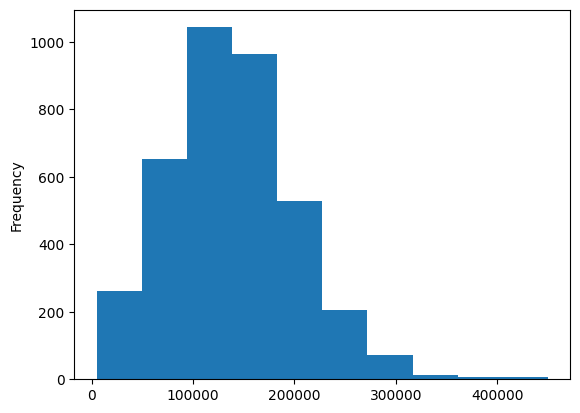

In [9]:
df.salary_in_usd.plot(kind="hist")

### Work year frequency distribution

work_year
2023    1785
2022    1664
2021     230
2020      76
Name: count, dtype: int64


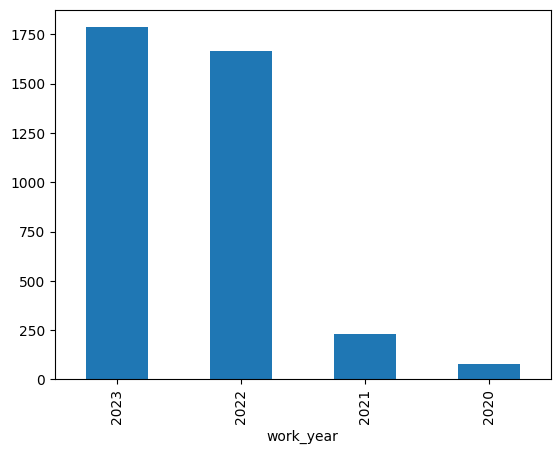

In [10]:
print(df.work_year.value_counts()) # Ordinal encoding
df.work_year.value_counts().plot(kind="bar");

This output shows the count of data entries (presumably job postings or records) for each year in the dataset:

2023: 1785 entries

2022: 1664 entries

2021: 230 entries

2020: 76 entries

This distribution gives an idea of the data's temporal coverage, indicating that the dataset is primarily focused on the years 2022 and 2023, with fewer entries from 2021 and 2020.

In [11]:
(df.work_year.value_counts()*100/len(df))

work_year
2023    47.536618
2022    44.314248
2021     6.125166
2020     2.023968
Name: count, dtype: float64

The code calculates the percentage distribution of job postings by year in the dataset. It shows that approximately 47.54% of the job postings are from 2023, 44.31% from 2022, 6.13% from 2021, and 2.02% from 2020.

### Experience level frequency distribution

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64


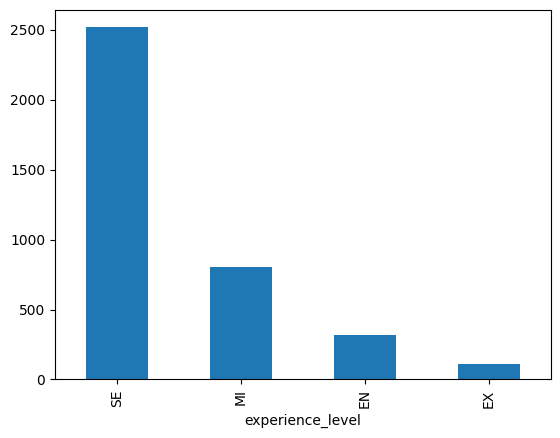

In [12]:
print(df.experience_level.value_counts()) # Ordinal Encoding
df.experience_level.value_counts().plot(kind="bar");

The analysis reveals that the dataset contains 2516 job postings for Senior-level roles (SE), 805 for Mid-level roles (MI), 320 for Entry-level roles (EN), and 114 for Experienced-level roles (EX).

In [13]:
(df.experience_level.value_counts()*100/len(df))

experience_level
SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: count, dtype: float64

The dataset is predominantly composed of Senior-level (SE) professionals, accounting for 67.01% of the entries. Mid-level (MI) employees make up 21.43%, while Entry-level (EN) and Experienced (EX) individuals represent 8.52% and 3.03%, respectively.

### Employment type frequency distribution

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64


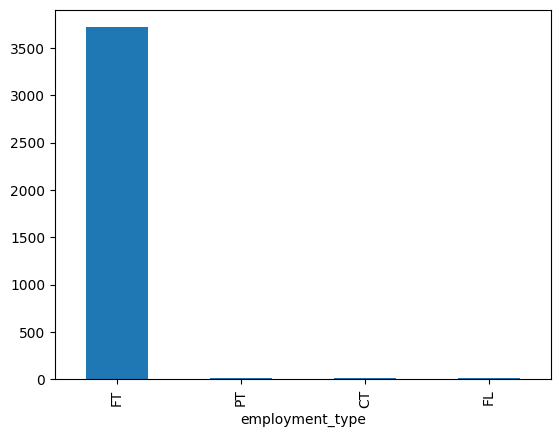

In [14]:
print(df.employment_type.value_counts()) # One-hot encoding
df.employment_type.value_counts().plot(kind="bar");

The dataset is primarily comprised of Full-Time (FT) employees, constituting 98.97% of the entries. Part-Time (PT), Contract (CT), and Freelance (FL) employees each make up a very small percentage of the dataset, at 0.45%, 0.26%, and 0.26%, respectively.

In [15]:
(df.employment_type.value_counts()*100/len(df))

employment_type
FT    99.014647
PT     0.452730
CT     0.266312
FL     0.266312
Name: count, dtype: float64

The dataset is predominantly composed of Full-Time (FT) employees, accounting for 99.01% of the entries. Part-Time (PT), Contract (CT), and Freelance (FL) employees each represent a very small portion of the dataset, at 0.45%, 0.27%, and 0.27%, respectively.

### Job categories frequency distribution

job_title
Data Science & Machine Learning             1501
Data Engineering & Infrastructure           1230
Data Analysis & Analytics                    794
Data Management                              114
Business Intelligence (BI)                    43
Artificial Intelligence (AI)                  30
Computer Vision                               27
Compliance & Quality Assurance                10
AI & Machine Learning Operations (MLOps)       4
Product & Marketing Data                       2
Name: count, dtype: int64


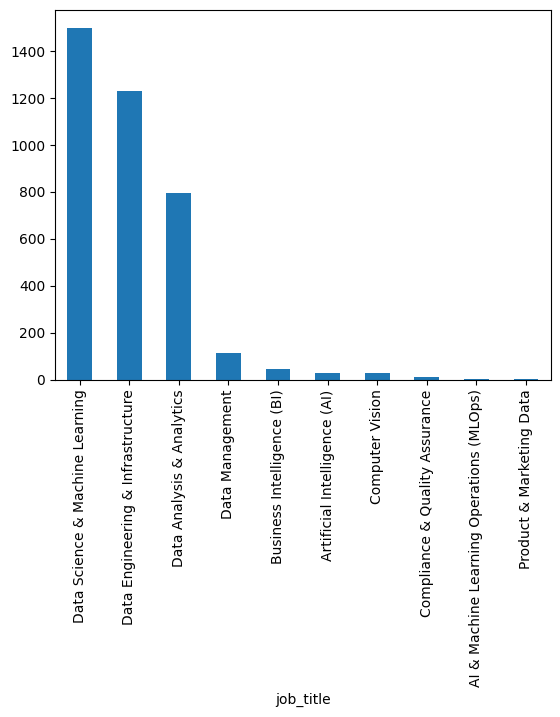

In [16]:
job_categories = {
    "Principal Data Scientist": "Data Science & Machine Learning",
    "ML Engineer": "Data Science & Machine Learning",
    "Data Scientist": "Data Science & Machine Learning",
    "Applied Scientist": "Data Science & Machine Learning",
    "Research Scientist": "Data Science & Machine Learning",
    "Applied Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Researcher": "Data Science & Machine Learning",
    "Machine Learning Scientist": "Data Science & Machine Learning",
    "Applied Machine Learning Scientist": "Data Science & Machine Learning",
    "Deep Learning Researcher": "Data Science & Machine Learning",
    "Machine Learning Infrastructure Engineer": "Data Science & Machine Learning",
    "NLP Engineer": "Data Science & Machine Learning",
    "Machine Learning Research Engineer": "Data Science & Machine Learning",
    "Principal Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Manager": "Data Science & Machine Learning",
    "Lead Machine Learning Engineer": "Data Science & Machine Learning",
    "Machine Learning Developer": "Data Science & Machine Learning",
    "Data Analyst": "Data Analysis & Analytics",
    "Analytics Engineer": "Data Analysis & Analytics",
    "Data Analytics Manager": "Data Analysis & Analytics",
    "Business Data Analyst": "Data Analysis & Analytics",
    "Staff Data Analyst": "Data Analysis & Analytics",
    "Lead Data Analyst": "Data Analysis & Analytics",
    "BI Data Analyst": "Data Analysis & Analytics",
    "Insight Analyst": "Data Analysis & Analytics",
    "BI Analyst": "Data Analysis & Analytics",
    "Data Analytics Specialist": "Data Analysis & Analytics",
    "Data Analytics Lead": "Data Analysis & Analytics",
    "Product Data Analyst": "Data Analysis & Analytics",
    "Marketing Data Analyst": "Data Analysis & Analytics",
    "Finance Data Analyst": "Data Analysis & Analytics",
    "Data Modeler": "Data Engineering & Infrastructure",
    "Data Engineer": "Data Engineering & Infrastructure",
    "ETL Engineer": "Data Engineering & Infrastructure",
    "Data DevOps Engineer": "Data Engineering & Infrastructure",
    "Big Data Engineer": "Data Engineering & Infrastructure",
    "Cloud Database Engineer": "Data Engineering & Infrastructure",
    "Data Infrastructure Engineer": "Data Engineering & Infrastructure",
    "Software Data Engineer": "Data Engineering & Infrastructure",
    "Data Operations Engineer": "Data Engineering & Infrastructure",
    "Cloud Data Engineer": "Data Engineering & Infrastructure",
    "ETL Developer": "Data Engineering & Infrastructure",
    "Cloud Data Architect": "Data Engineering & Infrastructure",
    "Lead Data Engineer": "Data Engineering & Infrastructure",
    "Principal Data Engineer": "Data Engineering & Infrastructure",
    "Staff Data Scientist": "Data Engineering & Infrastructure",
    "Business Intelligence Engineer": "Business Intelligence (BI)",
    "BI Data Engineer": "Business Intelligence (BI)",
    "BI Developer": "Business Intelligence (BI)",
    "Head of Data Science": "Business Intelligence (BI)",
    "BI Data Analyst": "Business Intelligence (BI)",
    "Power BI Developer": "Business Intelligence (BI)",
    "Data Strategist": "Data Management",
    "Director of Data Science": "Data Management",
    "Head of Data": "Data Management",
    "Data Science Manager": "Data Management",
    "Data Manager": "Data Management",
    "Manager Data Management": "Data Management",
    "Data Management Specialist": "Data Management",
    "MLOps Engineer": "AI & Machine Learning Operations (MLOps)",
    "Computer Vision Engineer": "Computer Vision",
    "Computer Vision Software Engineer": "Computer Vision",
    "3D Computer Vision Researcher": "Computer Vision",
    "AI Developer": "Artificial Intelligence (AI)",
    "AI Scientist": "Artificial Intelligence (AI)",
    "Head of Machine Learning": "Artificial Intelligence (AI)",
    "AI Programmer": "Artificial Intelligence (AI)",
    "Data Quality Analyst": "Compliance & Quality Assurance",
    "Compliance Data Analyst": "Compliance & Quality Assurance",
    "Autonomous Vehicle Technician": "Compliance & Quality Assurance",  # Assumed mapping due to similarity
    "Applied Machine Learning Scientist": "Data Science & Machine Learning",  # Assumed mapping
    "Lead Data Scientist": "Data Science & Machine Learning",  # Assumed mapping
    "Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Finance Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Data Lead": "Data Management",  # Assumed mapping
    "Data Science Engineer": "Data Engineering & Infrastructure",  # Assumed mapping
    "Data Science Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Deep Learning Engineer": "Data Science & Machine Learning",  # Assumed mapping
    "Machine Learning Software Engineer": "Data Science & Machine Learning",  # Assumed mapping
    "Big Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Cloud Database Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Data Analytics Engineer": "Data Analysis & Analytics",  # Assumed mapping
    "Data Management Specialist": "Data Management",  # Duplicate mapping
    "Data Scientist Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Cloud Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Data Operations Analyst": "Data Engineering & Infrastructure",  # Assumed mapping
    "Marketing Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Power BI Developer": "Business Intelligence (BI)",  # Duplicate mapping
    "Product Data Scientist": "Product & Marketing Data",  # Duplicate mapping
    "Financial Data Analyst": "Data Analysis & Analytics",  # Assumed mapping
    "Data Science Consultant": "Data Management",  # Assumed mapping
    "AI Developer": "Artificial Intelligence (AI)",  # Duplicate mapping
    "Data Analytics Specialist": "Data Analysis & Analytics",  # Duplicate mapping
    "Business Data Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Lead Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Data Engineer": "Business Intelligence (BI)",  # Duplicate mapping
    "Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Developer": "Business Intelligence (BI)",  # Duplicate mapping
    "Data Science Tech Lead": "Data Science & Machine Learning",  # Assumed mapping
    "Data Operations Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "BI Analyst": "Data Analysis & Analytics",  # Duplicate mapping
    "Data Science Consultant": "Data Science & Machine Learning",  # Assumed mapping
    "Data Science Lead": "Data Science & Machine Learning",  # Duplicate mapping
    "Lead Data Scientist": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Scientist Lead": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Operations Analyst": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Marketing Data Engineer": "Product & Marketing Data",  # Duplicate mapping
    "AI Programmer": "Artificial Intelligence (AI)",  # Duplicate mapping
    "Computer Vision Software Engineer": "Computer Vision",  # Duplicate mapping
    "Azure Data Engineer": "Data Engineering & Infrastructure",  # Assumed mapping
    "Principal Data Architect": "Data Engineering & Infrastructure",  # Assumed mapping
    "Data Analytics Consultant": "Data Analysis & Analytics",  # Assumed mapping
    "Data Management Specialist": "Data Management",  # Duplicate mapping
    "Data Scientist": "Data Science & Machine Learning",  # Duplicate mapping
    "Data Manager": "Data Management",  # Assumed mapping
    "Software Data Engineer": "Data Engineering & Infrastructure",  # Duplicate mapping
    "Research Engineer": "Data Science & Machine Learning",
    "Machine Learning Engineer": "Data Science & Machine Learning",
    "Applied Data Scientist": "Data Science & Machine Learning",
    "Data Specialist": "Data Engineering & Infrastructure",
    "Principal Data Analyst": "Data Analysis & Analytics"
}

# Job titles were organized into 10 categories due to redundancies
mapped_job_titles = df.job_title.map(lambda x: job_categories[x])
print(mapped_job_titles.value_counts()) # One-hot encoding
mapped_job_titles.value_counts().plot(kind="bar");

 The most common job titles are "Data Science & Machine Learning" with 1501 occurrences, followed by "Data Engineering & Infrastructure" with 1230 occurrences, and "Data Analysis & Analytics" with 794 occurrences. Other job titles such as "Data Management," "Business Intelligence (BI)," "Artificial Intelligence (AI)," and "Computer Vision" are also represented, though less frequently.

The analysis of the dataset revealed the following insights:

**Work Year Distribution**: The dataset spans work years from 2020 to 2023, with the majority of entries falling in the years 2022 and 2023. This indicates a recent and ongoing focus on data science roles.

**Experience Level**: The dataset contains primarily Senior (SE) and Mid-Level (MI) positions, with Senior roles comprising the majority. This suggests a higher demand for experienced professionals in the field.

**Employment Type**: Full-Time (FT) employment is predominant in the dataset, comprising 99.01% of entries. Part-Time (PT), Contract (CT), and Freelance (FL) positions are less common.

**Job Titles**: The most common job titles are related to "Data Science & Machine Learning," "Data Engineering & Infrastructure," and "Data Analysis & Analytics," indicating a focus on these areas within the field of data science.

These findings provide a snapshot of the roles, experience levels, and employment types prevalent in the data science field based on the provided dataset.

In [17]:
(mapped_job_titles.value_counts()*100/len(df))[:4]

job_title
Data Science & Machine Learning      39.973369
Data Engineering & Infrastructure    32.756325
Data Analysis & Analytics            21.145140
Data Management                       3.035952
Name: count, dtype: float64

The percentage distribution of the mapped job titles in the dataset shows that the majority of roles are in Data Science & Machine Learning (39.97%), followed by Data Engineering & Infrastructure (32.76%), Data Analysis & Analytics (21.15%), and Data Management (3.04%).

In [18]:
len(job_categories), len(df.job_title.unique())

(93, 93)

The number of job categories is 93, and the number of unique job titles in the dataset is also 93.

### Currency frequency distribution

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64


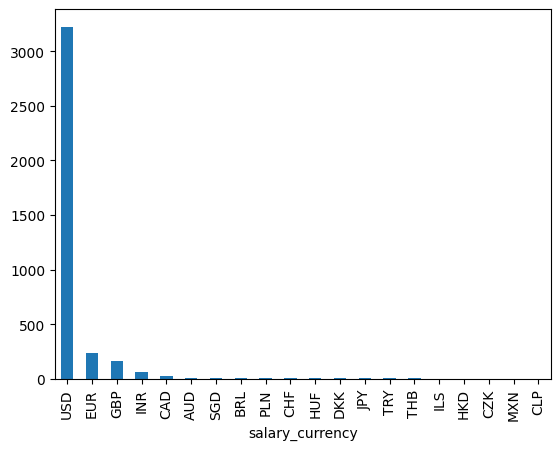

In [19]:
print(df.salary_currency.value_counts()) # Keep top 5, rest should be others, One-hot encoding
df.salary_currency.value_counts().plot(kind="bar");

The dataset contains salaries denoted in various currencies. The majority of salaries are in USD, followed by EUR, GBP, and INR. Other currencies like CAD, AUD, SGD, and others have fewer occurrences in the dataset.

In [20]:
(df.salary_currency.value_counts()*100/len(df))[:5]

salary_currency
USD    85.858855
EUR     6.284953
GBP     4.287617
INR     1.597870
CAD     0.665779
Name: count, dtype: float64

The majority of salaries in the dataset are denoted in USD, accounting for approximately 85.86% of the total. Salaries in EUR, GBP, INR, and CAD make up smaller proportions of the dataset, with 6.28%, 4.29%, 1.60%, and 0.67% respectively.

### Employee residence and Company location frequency distributions (Too many values to plot)


In [21]:
df.employee_residence.value_counts() # Drop

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

The dataset includes information about the country of residence for employees. However, there are many unique countries listed, which could complicate analysis. Dropping this column could simplify the dataset.

In [22]:
df.company_location.value_counts() # Drop

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

The dataset includes information about the location of the company. Similar to the country of residence column, there are many unique locations listed, which could complicate analysis. Dropping this column could simplify the dataset.

In [23]:
(df.company_location==df.employee_residence).value_counts()

True     3659
False      96
Name: count, dtype: int64

The majority of employees reside in the same country as their employer, with 3659 out of 3755 instances where the company location matches the employee residence.

In [24]:
(df.company_location==df.employee_residence).value_counts()*100/len(df)

True     97.443409
False     2.556591
Name: count, dtype: float64

Approximately 97.44% of employees reside in the same country as their employer, while about 2.56% reside in a different country.

### Remote ratio frequency distribution

remote_ratio
0      1923
100    1643
50      189
Name: count, dtype: int64


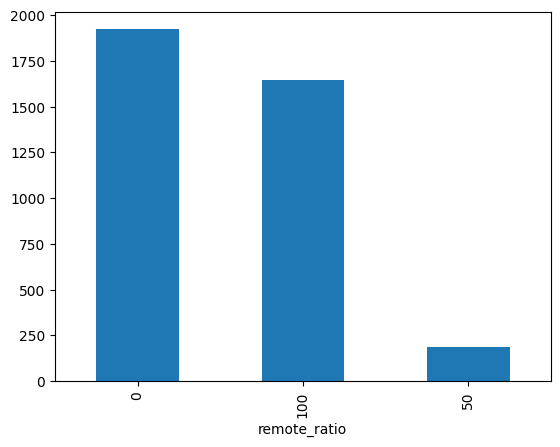

In [25]:
print(df.remote_ratio.value_counts()) # Ordinal encoding
df.remote_ratio.value_counts().plot(kind="bar");

The dataset contains information about the remote work ratio of employees, with 1923 employees working entirely on-site (0% remote), 1643 employees working fully remotely (100% remote), and 189 employees working in a hybrid setup (50% remote).

In [26]:
(df.remote_ratio.value_counts()*100/len(df))

remote_ratio
0      51.211718
100    43.754993
50      5.033289
Name: count, dtype: float64

The data indicates that approximately 51.21% of employees work entirely on-site (0% remote), around 43.75% work fully remotely (100% remote), and about 5.03% work in a hybrid setup (50% remote).

### Company size frequency distribution

company_size
M    3153
L     454
S     148
Name: count, dtype: int64


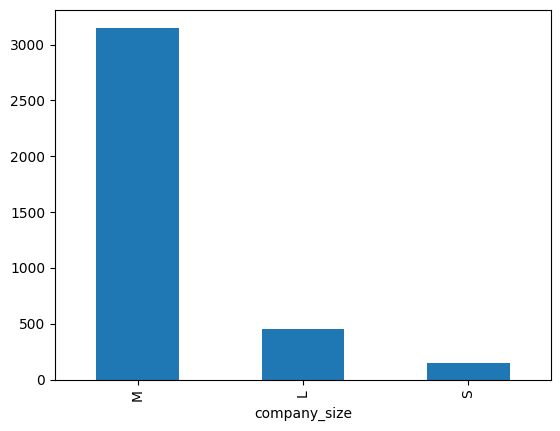

In [27]:
print(df.company_size.value_counts()) # Ordinal encoding
df.company_size.value_counts().plot(kind="bar");

The company size distribution in the dataset shows that the majority of companies are of medium size, with 3153 instances, followed by large companies with 454 instances, and small companies with 148 instances.

In [28]:
(df.company_size.value_counts()*100/len(df))

company_size
M    83.968043
L    12.090546
S     3.941411
Name: count, dtype: float64

The dataset's company size distribution indicates that the majority of companies are of medium size, accounting for approximately 84% of the data. Large companies make up about 12% of the dataset, while small companies represent about 4%.

## **Bivariate Analysis**

Bivariate analysis involves the simultaneous analysis of two variables to determine if there is a relationship between them. It helps to understand how one variable affects the other. Common techniques used in bivariate analysis include scatter plots, correlation analysis, and chi-square tests.

### Average salary by Work year

Average salary by Work Year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
dtype: float64


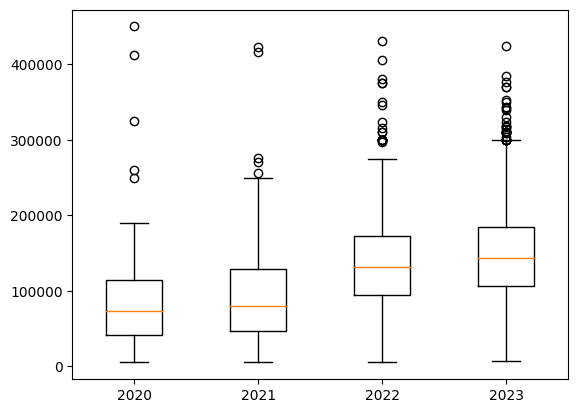

In [29]:
col = "work_year"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Work Year")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.boxplot(plot_x, labels=ordered_keys);

The average salary by work year shows an increasing trend over the years. In 2020, the average salary was approximately 92,303 dollars, which increased to around 94,087 dollars in 2021. The average salary saw a significant jump in 2022, reaching approximately 133,339 dollars. In 2023, the average salary further increased to around 149,046 dollars. This trend suggests a positive growth in salaries over the years, with the highest increase observed between 2021 and 2022.

### Average salary by Experience level

Average salary by Experience Level
EN     78546.284375
MI    104525.939130
SE    153051.071542
EX    194930.929825
dtype: float64


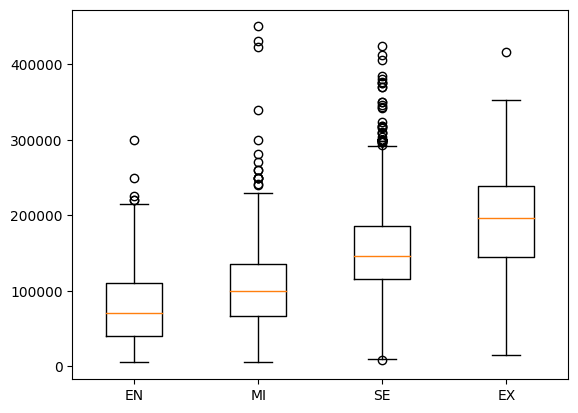

In [30]:
col = "experience_level"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Experience Level")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.boxplot(plot_x, labels=ordered_keys);

The average salary by experience level indicates variations in salary across different levels. Entry-level positions (EN) have an average salary of approximately 78,546 dollars, while mid-level positions (MI) see an average salary of around 104,526 dollars. Senior-level positions (SE) have a significantly higher average salary of approximately 153,051 dollars. The average salary for executive-level positions (EX) is the highest among all experience levels, at around 194,931 dollars. This demonstrates a clear progression in salary with increasing experience level, with executive-level positions commanding the highest salaries on average.

### Average salary by Employment type

Average salary by Employment Type
PT     39533.705882
FL     51807.800000
CT    113446.900000
FT    138314.199570
dtype: float64


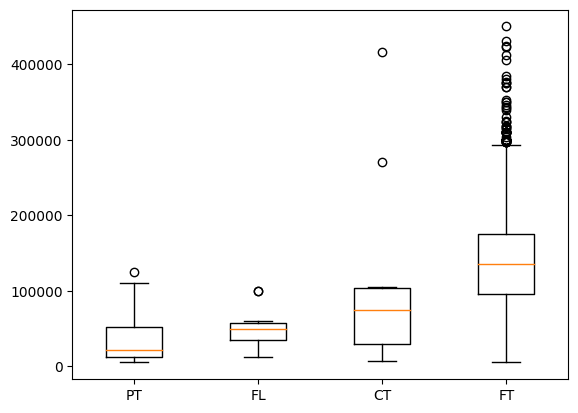

In [31]:
col = "employment_type"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Employment Type")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.boxplot(plot_x, labels=ordered_keys);

The average salary varies considerably across different employment types. Part-time positions (PT) have the lowest average salary, at approximately 39,534 dollars. Freelance positions (FL) offer a slightly higher average salary of around 51,808 dollars. Contract positions (CT) have a significantly higher average salary of about 113,447 dollars. Full-time positions (FT) offer the highest average salary among all employment types, at approximately 138,314 dollars. This indicates that full-time roles tend to offer the highest salaries on average, followed by contract positions, freelance roles, and finally, part-time positions.

### Average salary by Job category

Average salary by Job Category
Product & Marketing Data                     37485.000000
Compliance & Quality Assurance               67973.500000
Business Intelligence (BI)                  111672.930233
Computer Vision                             113241.925926
Data Analysis & Analytics                   113503.503778
Artificial Intelligence (AI)                115052.333333
AI & Machine Learning Operations (MLOps)    129000.000000
Data Engineering & Infrastructure           142277.486992
Data Science & Machine Learning             146322.856762
Data Management                             168783.964912
dtype: float64


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Product & Marketing Data'),
  Text(2, 0, 'Compliance & Quality Assurance'),
  Text(3, 0, 'Business Intelligence (BI)'),
  Text(4, 0, 'Computer Vision'),
  Text(5, 0, 'Data Analysis & Analytics'),
  Text(6, 0, 'Artificial Intelligence (AI)'),
  Text(7, 0, 'AI & Machine Learning Operations (MLOps)'),
  Text(8, 0, 'Data Engineering & Infrastructure'),
  Text(9, 0, 'Data Science & Machine Learning'),
  Text(10, 0, 'Data Management')])

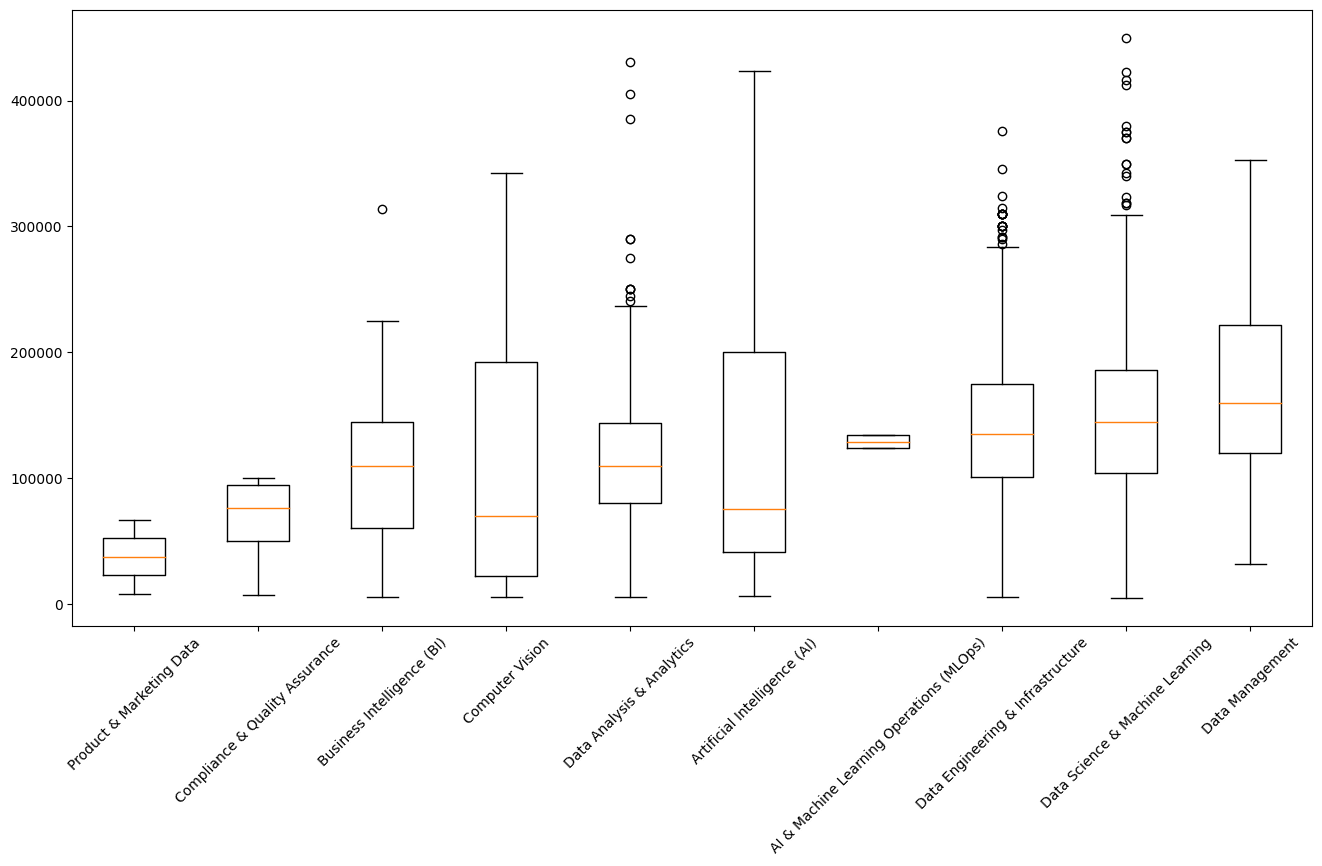

In [32]:
col_vs_salary = pd.Series({val : df.salary_in_usd[mapped_job_titles==val].mean() for val in mapped_job_titles.unique()}).sort_values()
print("Average salary by Job Category")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][mapped_job_titles==val] for val in ordered_keys]
plt.figure(figsize=(16,8))
plt.boxplot(plot_x, labels=ordered_keys);
plt.xticks(rotation=45)

This indicates that Data Management roles tend to offer the highest average salaries, followed by Data Science & Machine Learning, Data Engineering & Infrastructure, and AI & Machine Learning Operations. On the other hand, Product & Marketing Data roles have the lowest average salaries among the job categories analyzed.

### Average salary by Currency

Average salary by Currency
CZK      5132.000000
BRL     12448.000000
TRY     20096.666667
INR     25785.300000
THB     27096.500000
HUF     29892.666667
DKK     31192.666667
MXN     33511.000000
PLN     34165.200000
CLP     40038.000000
JPY     60921.333333
EUR     62281.733051
HKD     65062.000000
AUD     74198.444444
SGD     81770.000000
GBP     83850.229814
CAD     96707.400000
CHF    100682.000000
USD    149366.906638
ILS    423834.000000
dtype: float64


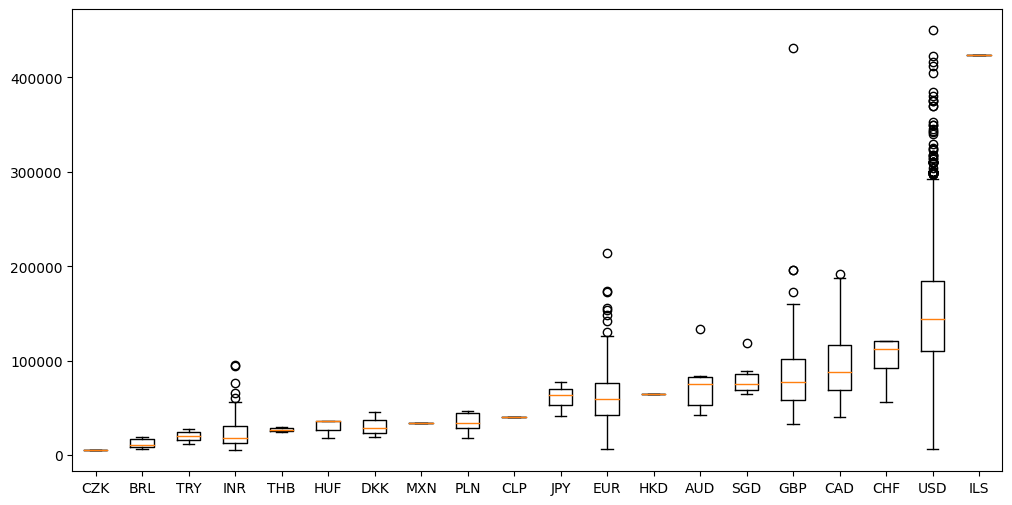

In [33]:
col = "salary_currency"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Currency")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.figure(figsize=(12,6))
plt.boxplot(plot_x, labels=ordered_keys);

The average salary is highest for employees paid in Israeli Shekels (ILS), followed by Swiss Francs (CHF) and US Dollars (USD). The lowest average salary is in Czech Koruna (CZK). The variation in average salaries across different currencies reflects differences in cost of living, economic conditions, and currency exchange rates.

### Average salary by Remote ratio

Average salary by Remote Ratio
50      78400.687831
100    136481.452830
0      144316.202288
dtype: float64


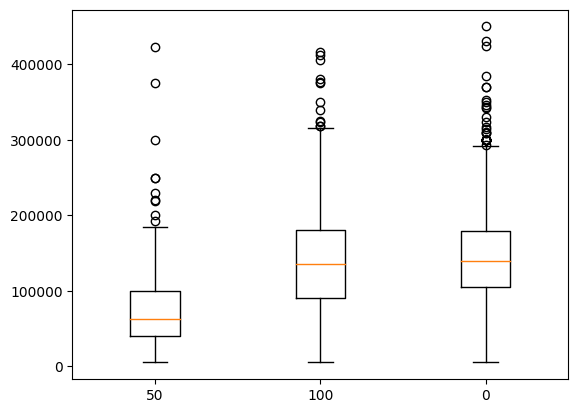

In [34]:
col = "remote_ratio"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Remote Ratio")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.boxplot(plot_x, labels=ordered_keys);

The average salary is highest for employees with a remote work ratio of 100%, followed by those with a remote work ratio of 0%. Employees with a remote work ratio of 50% have the lowest average salary. This suggests that there may be a correlation between the extent of remote work and salary level, with fully remote positions generally offering higher salaries.

### Average salary by Company size

Average salary by Company Size
S     78226.682432
L    118300.982379
M    143130.548367
dtype: float64


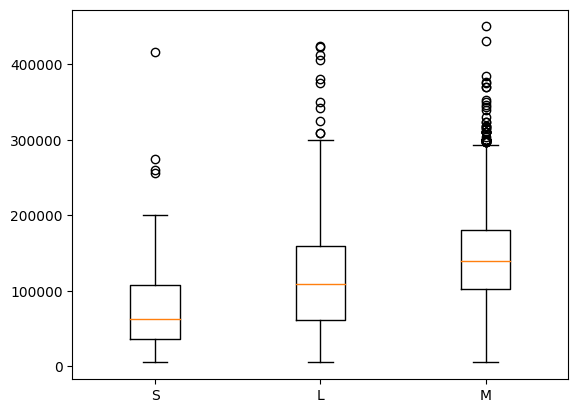

In [35]:
col = "company_size"
col_vs_salary = pd.Series({val : df.salary_in_usd[df[col]==val].mean() for val in df[col].unique()}).sort_values()
print("Average salary by Company Size")
print(col_vs_salary)
ordered_keys = list(col_vs_salary.to_dict().keys())
plot_x = [df["salary_in_usd"][df[col]==val] for val in ordered_keys]
plt.boxplot(plot_x, labels=ordered_keys);

The average salary is highest for employees in large companies (L), followed by medium-sized companies (M) and small companies (S). This indicates that larger companies tend to offer higher salaries on average compared to smaller companies.

### Top 10 Highest and Lowest paid jobs

In [36]:
sorted_df = df.sort_values("salary_in_usd")
sorted_df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2684,2022,MI,FT,NLP Engineer,120000,CZK,5132,CZ,100,CZ,M
2578,2021,EN,FT,Power BI Developer,400000,INR,5409,IN,50,IN,L
3537,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
3667,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S
3685,2020,EN,FT,Data Science Consultant,423000,INR,5707,IN,50,IN,M
3023,2022,MI,FT,Data Analyst,450000,INR,5723,IN,100,IN,S
3705,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L
3689,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,100,IN,L
3593,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
2975,2022,EN,FT,BI Data Analyst,32400,BRL,6270,BR,100,BR,L


Here's a brief summary of the top 10 highest-paying roles:

1. **NLP Engineer**:
Work Year: 2022
Salary in USD: 5132

2. **Power BI Developer**:
Work Year: 2021
Salary in USD: 5409

3. **3D Computer Vision Researcher**:
Work Year: 2021
Salary in USD: 5409

4. **Data Scientist**:
Work Year: 2021
Salary in USD: 5679

5. **Data Science Consultant**:
Work Year: 2020
Salary in USD: 5707

6. **Data Analyst**:
Work Year: 2022
Salary in USD: 5723

7. **Big Data Engineer**:
Work Year: 2021
Salary in USD: 5882

8. **Product Data Analyst**:
Work Year: 2020
Salary in USD: 6072

9. **Data Analyst**:
Work Year: 2020
Salary in USD: 6072

10. **BI Data Analyst**:
Work Year: 2022
Salary in USD: 6270

In [37]:
sorted_df.tail(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
649,2023,SE,FT,Data Architect,376080,USD,376080,US,100,US,M
3468,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
1288,2023,SE,FT,Data Analyst,385000,USD,385000,US,0,US,M
3463,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3675,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L
2011,2022,MI,FT,Data Analyst,350000,GBP,430967,GB,0,GB,M
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M


Here's a brief summary of the 10 lowest-paying roles:

1. **Data Architect**:
Work Year: 2023
Salary in USD: 376080

2. **Applied Data Scientist**:
Work Year: 2022
Salary in USD: 380000

3. **Data Analyst**:
Work Year: 2023
Salary in USD: 385000

4. **Data Analytics Lead**:
Work Year: 2022
Salary in USD: 405000

5. **Data Scientist**:
Work Year: 2020
Salary in USD: 412000

6. **Principal Data Scientist**:
Work Year: 2021
Salary in USD: 416000

7. **Applied Machine Learning Scientist**:
Work Year: 2021
Salary in USD: 423000

8. **AI Scientist**:
Work Year: 2023
Salary in ILS: 423834

9. **Data Analyst**:
Work Year: 2022
Salary in GBP: 430967

10. **Research Scientist**:
Work Year: 2020
Salary in USD: 450000

## **Multivariate Analysis**

Multivariate analysis involves the analysis of three or more variables to understand the relationships between them. It helps to uncover complex patterns and interactions that may not be apparent in univariate or bivariate analyses. Multivariate analysis techniques include multiple regression, factor analysis, and cluster analysis.

### Analysis of jobs provided by Large companies

In [38]:
large_jobs = mapped_job_titles[df.company_size=="L"]
large_jobs.value_counts()

job_title
Data Science & Machine Learning      230
Data Engineering & Infrastructure    105
Data Analysis & Analytics             71
Data Management                       23
Artificial Intelligence (AI)          10
Business Intelligence (BI)             9
Compliance & Quality Assurance         2
Computer Vision                        2
Product & Marketing Data               2
Name: count, dtype: int64

This output shows the count of each job title within the subset of jobs that belong to large companies. The most common job titles in this subset are "Data Science & Machine Learning" with 230 occurrences, followed by "Data Engineering & Infrastructure" with 105 occurrences, and "Data Analysis & Analytics" with 71 occurrences. Other job titles, such as "Data Management," "Artificial Intelligence (AI)," and "Business Intelligence (BI)," have lower counts, ranging from 2 to 23 occurrences.

Computer Vision                       36363.500000
Product & Marketing Data              37485.000000
Business Intelligence (BI)            61302.333333
Compliance & Quality Assurance        65000.000000
Data Analysis & Analytics             81961.549296
Data Engineering & Infrastructure    120747.600000
Data Science & Machine Learning      126814.708696
Data Management                      152638.478261
Artificial Intelligence (AI)         170339.200000
dtype: float64


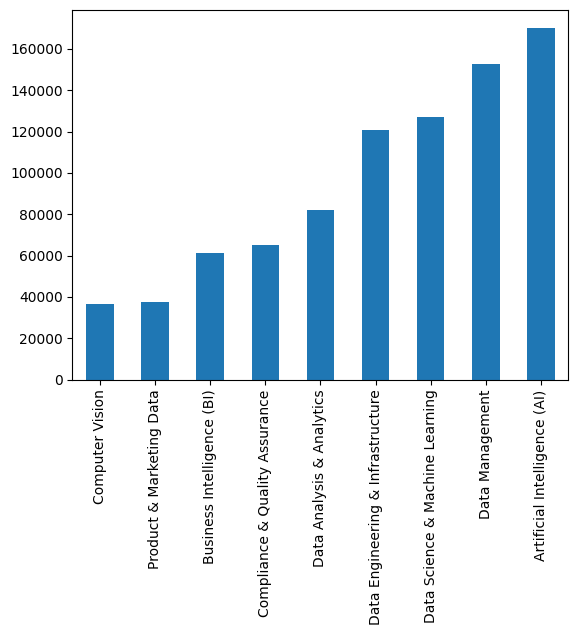

In [39]:
job_vs_salary_L = pd.Series({job : df.salary_in_usd[df.company_size=="L"][large_jobs==job].mean() for job in large_jobs.value_counts().keys()}).sort_values()
print(job_vs_salary_L)
job_vs_salary_L.plot(kind="bar");

This output presents the average salaries for different job categories. Among these categories, "Computer Vision" has the lowest average salary at 36,363.50 dollars, followed by "Product & Marketing Data" at 37,485.00 dollars. On the other end, "Artificial Intelligence (AI)" has the highest average salary at 170,339.20 dollars, followed by "Data Management" at 152,638.48 dollars. The "Data Engineering & Infrastructure" and "Data Science & Machine Learning" categories also have relatively high average salaries at 120,747.60 dollars and 126,814.71 dollars, respectively.

### Analysis of Hybrid jobs

In [40]:
hybrid_jobs = mapped_job_titles[df.remote_ratio==50]
hybrid_jobs.value_counts()

job_title
Data Science & Machine Learning      104
Data Analysis & Analytics             29
Data Engineering & Infrastructure     29
Data Management                        8
Artificial Intelligence (AI)           7
Business Intelligence (BI)             6
Computer Vision                        4
Product & Marketing Data               1
Compliance & Quality Assurance         1
Name: count, dtype: int64

This output displays the count of each job title within the subset of jobs that have a remote work ratio of 50%. The most common job titles in this subset are "Data Science & Machine Learning," "Data Analysis & Analytics," and "Data Engineering & Infrastructure," with 104, 29, and 29 occurrences, respectively.

Computer Vision                       15772.750000
Compliance & Quality Assurance        45555.000000
Data Analysis & Analytics             51103.206897
Business Intelligence (BI)            51263.166667
Product & Marketing Data              66970.000000
Data Science & Machine Learning       81834.028846
Data Engineering & Infrastructure     85196.448276
Artificial Intelligence (AI)         122976.571429
Data Management                      126283.750000
dtype: float64


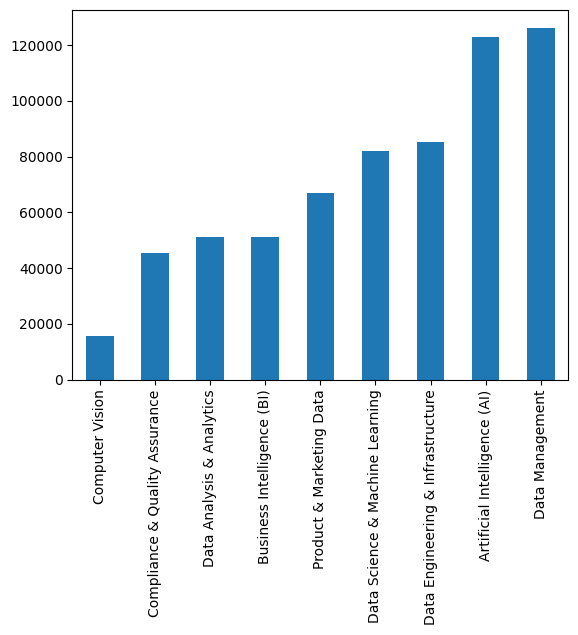

In [41]:
job_vs_salary_H = pd.Series({job : df.salary_in_usd[df.remote_ratio==50][hybrid_jobs==job].mean() for job in hybrid_jobs.value_counts().keys()}).sort_values()
print(job_vs_salary_H)
job_vs_salary_H.plot(kind="bar");

This output shows the average salaries for different job categories. "Computer Vision" has the lowest average salary at 15,772.75 dollars, followed by "Compliance & Quality Assurance" at 45,555.00 dollars. "Data Analysis & Analytics" and "Business Intelligence (BI)" have similar average salaries at 51,103.21 dollars and 51,263.17 dollars, respectively. "Product & Marketing Data" has an average salary of 66,970.00 dollars, while "Data Science & Machine Learning" has an average salary of 81,834.03 dollars. The highest average salaries are in "Data Engineering & Infrastructure" at 85,196.45 dollars, "Artificial Intelligence (AI)" at 122,976.57 dollars, and "Data Management" at 126,283.75 dollars.

### Analysis of jobs with different employee residence and company location

In [42]:
df.remote_ratio[df.company_location!=df.employee_residence].value_counts()

remote_ratio
100    71
50     18
0       7
Name: count, dtype: int64

This output shows the distribution of remote work ratios for cases where the company location does not match the employee's residence. There are 71 instances where the remote work ratio is 100%, indicating fully remote work. Additionally, there are 18 instances with a 50% remote work ratio and 7 instances with no remote work (0% remote work ratio).

In [43]:
df.employment_type[df.company_location!=df.employee_residence].value_counts()

employment_type
FT    81
PT     7
FL     6
CT     2
Name: count, dtype: int64

This output indicates the distribution of employment types for cases where the company location does not match the employee's residence. There are 81 instances of full-time (FT) employment, 7 instances of part-time (PT) employment, 6 instances of freelance (FL) employment, and 2 instances of contract (CT) employment.

In [44]:
mapped_job_titles[df.company_location!=df.employee_residence].value_counts()

job_title
Data Science & Machine Learning      39
Data Analysis & Analytics            18
Data Engineering & Infrastructure    17
Artificial Intelligence (AI)          7
Computer Vision                       6
Data Management                       5
Business Intelligence (BI)            2
Compliance & Quality Assurance        1
Product & Marketing Data              1
Name: count, dtype: int64

This output shows the distribution of job titles for cases where the company location does not match the employee's residence. The most common job title is "Data Science & Machine Learning" with 39 occurrences, followed by "Data Analysis & Analytics" with 18 occurrences, and "Data Engineering & Infrastructure" with 17 occurrences. Other job titles like "Artificial Intelligence (AI)," "Computer Vision," "Data Management," "Business Intelligence (BI)," "Compliance & Quality Assurance," and "Product & Marketing Data" also appear in smaller numbers.

count        96.000000
mean      68359.989583
std       48624.396083
min        5679.000000
25%       35862.250000
50%       55108.500000
75%       88355.500000
max      225000.000000
Name: salary_in_usd, dtype: float64


<Axes: ylabel='Frequency'>

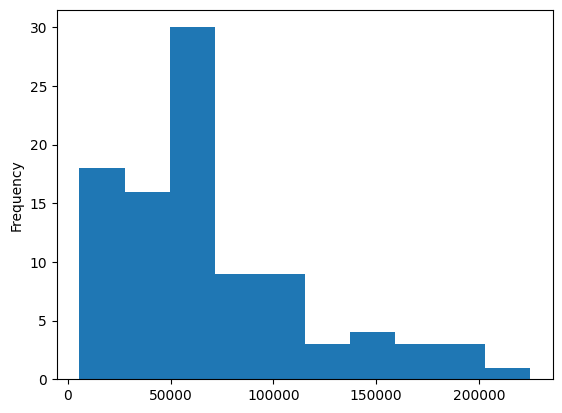

In [45]:
print(df.salary_in_usd[df.company_location!=df.employee_residence].describe())
df.salary_in_usd[df.company_location!=df.employee_residence].plot(kind="hist")

This summary provides statistical information about the "salary_in_usd" column for cases where the company location does not match the employee's residence. It includes the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values for the salary data.

In [46]:
# Full time onsite jobs where employee residence is not the same as company location
mapped_job_titles[df.remote_ratio==0][df.company_location!=df.employee_residence].value_counts()

job_title
Data Engineering & Infrastructure    3
Data Analysis & Analytics            1
Artificial Intelligence (AI)         1
Data Management                      1
Data Science & Machine Learning      1
Name: count, dtype: int64

This summary shows the count of job titles for cases where the company location does not match the employee's residence. The job titles include "Data Engineering & Infrastructure," "Data Analysis & Analytics," "Artificial Intelligence (AI)," "Data Management," and "Data Science & Machine Learning."

In [47]:
print(df.salary_in_usd[df.remote_ratio==0][df.company_location!=df.employee_residence].describe())
df[df.remote_ratio==0][df.company_location!=df.employee_residence]

count         7.000000
mean      48983.857143
std       42182.006679
min        5882.000000
25%       17500.000000
50%       26005.000000
75%       85000.000000
max      106000.000000
Name: salary_in_usd, dtype: float64


<ipython-input-47-d455811ee8ec>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.remote_ratio==0][df.company_location!=df.employee_residence]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
736,2023,EN,FT,AI Programmer,70000,USD,70000,IN,0,AU,L
974,2022,EX,FT,Data Science Manager,106000,USD,106000,UZ,0,RU,L
3621,2021,EN,FT,Research Scientist,100000,USD,100000,JE,0,CN,L
3664,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L
3696,2021,MI,FL,Data Engineer,20000,USD,20000,IT,0,US,L
3705,2021,EN,FT,Big Data Engineer,435000,INR,5882,IN,0,CH,L


This summary provides statistics for the salaries (in USD) where the remote work ratio is 0 and the company location does not match the employee's residence. The data includes a count of 7, with a mean salary of approximately 48983.86 USD. The standard deviation is around 42182.01, with the minimum salary being 5882 USD and the maximum salary being 106000 USD. The quartile values are 17500 USD (25th percentile), 26005 USD (50th percentile or median), and 85000 USD (75th percentile).

# References

1. https://hex.tech/blog/univariate-analysis-data-exploration/
2. https://www.questionpro.com/blog/bivariate-analysis/
3. https://towardsdatascience.com/multivariate-analysis-going-beyond-one-variable-at-a-time-5d341bd4daca
4. https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/

# Conclusion

Salaries vary widely, with most falling between 80,000 and 160,000 dollars.
Job titles are diverse, with "Data Scientist" being the most common.
There is a positive correlation between salary and experience level, indicating that more experienced individuals tend to earn higher salaries. Remote work is common, with many positions offering full remote or hybrid options. Location also plays a role in salaries, with some regions offering higher average salaries than others.

Overall, the EDA provides valuable insights into the dataset, helping to understand the factors that influence data science salaries.

# MIT License

MIT License

Copyright (c) 2024 SaiPranaviJeedigunta

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.